In [1]:
import os, os.path
import numpy as np
from time import time
import pandas as pd
import math as m
import setup_runs as sr
import importlib
import matplotlib.pyplot as plt
import itertools

In [33]:
##  MERGE IN ANALYTICA RUNS FOR SELECT SECTORS

arch_name = "Chile_sector_package_2021_01_30_design_id-1"
df_an_arch = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_name)
df_an_new = pd.read_csv(sr.fp_csv_output_multi_sector_analytica.replace(".csv", "_AGFOONLY.csv"))

sectors_repl = ["ag-", "fo-"]
fields_repl = [x for x in df_an_new.columns if (x[0:3] in sectors_repl)]
fields_merge = ["master_id", "year"]
#merge in new analytica runs
df_an_new_out = df_an_arch[[x for x in df_an_arch.columns if x not in fields_repl]]
df_an_new_out = pd.merge(df_an_new_out, df_an_new[fields_merge + fields_repl], how = "left", on = fields_merge)
#sort output columns
fields_sorted = [x for x in df_an_new_out.columns if (x not in fields_merge)]
fields_sorted.sort()

df_an_new_out = df_an_new_out[fields_merge + fields_sorted]
df_an_new_out.to_csv(sr.fp_csv_output_multi_sector_analytica, index = None, encoding = "UTF-8")




In [79]:
##  MERGE PMR FILES

df_pmr_21 = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_d2-1.csv"))
df_pmr_22 = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_d2-2.csv"))

df_pmr_2 = pd.concat([df_pmr_21, df_pmr_22[df_pmr_21.columns]], axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)




In [96]:

arch = "Chile_sector_package_2021_02_10_design_id-3"
df_attribute_master_id = sr.get_archive_run(sr.fp_csv_attribute_master, arch)
#get python outputs
df_py = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch)
#get experimental design outputs
df_ed = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch)
#bring in both designs and reduce to 0
df_ed = df_ed[df_ed["design_id"] == 0]
#get analytica outputs
df_an = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch)


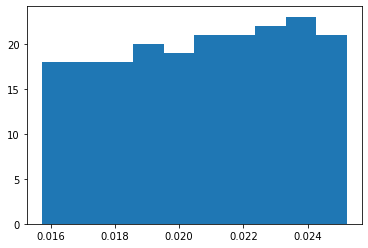

In [138]:
dfe = df_ed[(df_ed["year"] == 2050) & (df_ed["design_id"] == 0) & (df_ed["strategy_id"] == 1) & (df_ed["time_series_id"] == 0)]
lcheck = list(dfe["gr_pib"])
plt.hist(lcheck)
plt.show()

In [146]:
import importlib
import sector_model_transport as smt 
# Transportation correction for econometric model
df_tmp_correction_for_pib_peso_traj = pd.read_csv(sr.fp_csv_tmp_correction_for_pib_peso_traj)
#get baseline data from experimental design
df_tmp_correction_for_pib_peso_traj = pd.merge(df_tmp_correction_for_pib_peso_traj, exp_design[exp_design["master_id"] == 0][["year", "pib"]].copy(), how = "left", on = ["year"]).reset_index(drop = True)
#add scalar and string name
str_pib_scalar = "pib_scalar_transport"
df_tmp_correction_for_pib_peso_traj[str_pib_scalar] = np.array(df_tmp_correction_for_pib_peso_traj["pib_peso_luis_20201218"])/np.array(df_tmp_correction_for_pib_peso_traj["pib"])
df_tmp_correction_for_pib_peso_traj = df_tmp_correction_for_pib_peso_traj[["year", str_pib_scalar]]

exp_design = pd.merge(df_ed, df_tmp_correction_for_pib_peso_traj, how = "left", on = ["year"]).sort_values(by = ["master_id", "year"]).reset_index(drop = True)



In [241]:
importlib.reload(smt)

temp = smt.sm_transport(exp_design, {"transport": "tx"})

out2 = np.round(temp["transport_pkm_aviation_0"].copy(), 2)
out3 = np.round(temp["transport_pkm_aviation"].copy(), 2)
sat = np.array(exp_design["transport_saturation_aviation"])

In [240]:
year = np.array(exp_design["year"])
gdp = np.array(exp_design["pib"])*np.array(exp_design["pib_scalar_transport"])
#plt.hist()
#plt.show()
1.001**27000

524918575514.9427

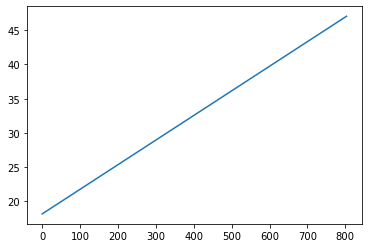

In [244]:
ms = np.array(range(0, 804))#np.array(exp_design[exp_design.iloc[[i*36-1 for i in range(1, int(n/36))]]])
y = np.array([out3[i*36 - 1] for i in range(1, int(len(exp_design)/36) + 1)])

plt.plot(ms, np.log(y))
plt.show()



In [203]:
a = 0.3113
b = 0.8437
c = -1.0978

pkm_2015 = 10862059  # [pkm]
pkm_2016 = 12200515  # [pkm]
pkm_2017 = 13134871  # [pkm]

# Creacion de la variable a contener la demanda energetica
pkm_aviation = np.ones(len(year))

In [221]:
n = 28000
pkm_aviation = np.ones(n)
for i in range(n):
    if year[i] == 2015:
        pkm_aviation[i] = pkm_2015
    elif year[i] == 2016:
        pkm_aviation[i] = pkm_2016
    elif year[i] == 2017:
        pkm_aviation[i] = pkm_2017
    else:
        pkm_aviation[i] = np.exp(a * np.log(gdp[i]) + b * np.log(pkm_aviation[i - 1]) + c)


In [220]:
set([year[i*36 - 1] for i in range(1, int(n/36) + 1)])

{2050}

In [222]:
out = np.round(pkm_aviation/(10**6), 2)
[out[i*36 - 1] for i in range(1, int(n/36) + 1)]

[68.81,
 60.98,
 70.53,
 64.14,
 75.04,
 66.36,
 68.09,
 65.93,
 60.26,
 71.38,
 72.78,
 68.77,
 68.31,
 74.17,
 69.98,
 61.61,
 65.79,
 64.64,
 60.17,
 63.81,
 72.96,
 75.33,
 64.22,
 60.01,
 76.06,
 64.81,
 72.92,
 72.51,
 75.21,
 63.43,
 62.72,
 63.06,
 73.86,
 76.34,
 76.29,
 61.69,
 73.7,
 71.4,
 74.6,
 67.33,
 66.88,
 73.44,
 76.41,
 68.43,
 62.51,
 62.89,
 71.78,
 74.31,
 72.04,
 64.01,
 63.6,
 62.14,
 65.03,
 70.09,
 70.34,
 67.27,
 74.71,
 71.18,
 73.91,
 71.64,
 60.75,
 69.57,
 65.85,
 65.13,
 60.52,
 64.91,
 65.11,
 70.8,
 63.97,
 74.41,
 60.62,
 69.39,
 71.05,
 59.55,
 67.05,
 68.74,
 75.73,
 67.68,
 65.72,
 70.65,
 69.47,
 75.7,
 70.44,
 74.94,
 69.1,
 76.2,
 70.23,
 75.46,
 62.53,
 67.49,
 74.72,
 62.64,
 75.95,
 74.85,
 73.62,
 73.56,
 66.09,
 61.22,
 59.38,
 60.43,
 66.53,
 62.32,
 60.08,
 67.98,
 63.27,
 60.97,
 69.8,
 64.48,
 71.74,
 59.37,
 64.74,
 62.35,
 61.08,
 72.28,
 66.73,
 75.45,
 60.66,
 64.33,
 69.27,
 69.72,
 76.08,
 65.47,
 59.74,
 75.85,
 69.9,
 72.63,
 6

In [196]:
#df_py[(df_py["year"] == 2050) & (df_py["master_id"].isin([202, 250, 300, 350, 400]))][[x for x in df_py.columns if x[0:3] == "tx-"]]
#tx-OPEX_transport_aviation-MMUSD
#tx-electricity_hydrogen-gwh
#tx-electricity_total_demand-gwh
#tx-emissions_aviation-mtco2e
#transport_emission_aviation = transport_demand_aviation_kerosene * fact * emission_fact_kerosene_aviation / (10 ** 9)





In [34]:
arch_all = "Chile_sector_package_2021_01_30_design_id-1"
arch_nxl = "Chile_sector_package_2021_01_30_design_id-0"
df_attribute_master_id = sr.get_archive_run(sr.fp_csv_attribute_master, arch_all)



#get python outputs
df_py_all = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch_all)
df_py_nxl = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch_nxl)

#get experimental design outputs
df_ed_all = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch_all)
df_ed_nxl = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch_nxl)
#bring in both designs and reduce to 0
df_ed_all = df_ed_all[df_ed_all["design_id"] == 0]
df_ed_nxl = df_ed_nxl[df_ed_nxl["design_id"] == 0]

#get pmr outputs 
df_pmr_all = sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, arch_all)
df_pmr_nxl = sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, arch_nxl)

#get analytica outputs
df_an_all = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_all)
df_an_nxl = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_nxl)

dict_dsubs = {}
fields_merge = ["strategy_id", "time_series_id", "future_id"]

for d in df_attribute_master_id["design_id"].unique():
    df_tmp = df_attribute_master_id[df_attribute_master_id["design_id"] == d].copy()
    df_tmp = df_tmp[[x for x in df_tmp.columns if (x not in ["design_id", "run_id"])]]
    dict_rnm = {"master_id": ("master_id-" + str(d))}
    df_tmp = df_tmp.rename(columns = dict_rnm)
    
    dict_dsubs.update({d: df_tmp})

ddk = list(dict_dsubs.keys())
#merge map
df_merge_map = dict_dsubs[ddk[0]].copy()

for k in ddk[1:len(ddk)]:
    df_merge_map = pd.merge(df_merge_map, dict_dsubs[k].copy(), how = "inner", on = fields_merge)
    
df_merge_map = df_merge_map.sort_values(by = ["master_id-" + str(ddk[0])]).reset_index(drop = True)
#dictionary to convert data
dict_convert = sr.build_dict(df_merge_map[["master_id-0", "master_id-1"]])

#update ids
df_py_all["master_id"] = df_py_all["master_id"].replace(dict_convert)
df_an_all["master_id"] = df_an_all["master_id"].replace(dict_convert)
df_pmr_all["master_id"] = df_pmr_all["master_id"].replace(dict_convert)
df_ed_all["design_id"] = df_ed_all["design_id"].replace({0: 1})
df_ed_all["master_id"] = df_ed_all["master_id"].replace(dict_convert)

#connect together
df_py_out = pd.concat([df_py_all, df_py_nxl], axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_an_out = pd.concat([df_an_all, df_an_nxl], axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_ed_out = pd.concat([df_ed_all, df_ed_nxl], axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_pmr_out = pd.concat([df_pmr_all, df_pmr_nxl], axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)

df_py_out = df_py_out.fillna(0.0)
df_an_out = df_an_out.fillna(0.0)

#write output
df_py_out.to_csv(sr.fp_csv_output_multi_sector, index = None, encoding = "UTF-8")
df_an_out.to_csv(sr.fp_csv_output_multi_sector_analytica, index = None, encoding = "UTF-8")
df_pmr_out.to_csv(sr.fp_csv_output_multi_sector_pmr, index = None, encoding = "UTF-8")
df_ed_out.to_csv(sr.fp_csv_experimental_design_msec, index = None, encoding = "UTF-8")



In [77]:
arch_2 = "Chile_sector_package_2021_02_10_design_id-2"
#df_ed_out.to_csv(sr.fp_csv_experimental_design_msec, index = None, encoding = "UTF-8")
df_edgams = sr.get_archive_run(sr.fp_csv_experimental_design_msec_masters_to_run_gams, arch_2)
df_mas = sr.get_archive_run(sr.fp_csv_attribute_master, arch_2)

#set of masters to keep
keep_master = set(df_mas[(df_mas["design_id"] == 0) & (df_mas["strategy_id"] == 1) & ((df_mas["time_series_id"] == 0) | (df_mas["future_id"] == 0))]["master_id"])
df_edgams = df_edgams[df_edgams["master_id"].isin(keep_master)]
df_edgams1 = df_edgams[0:101]
df_edgams2 = df_edgams[101:202]

df_edgams1.to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams.replace(".csv", "_d2-1.csv"), index = None, encoding = "UTF-8")
df_edgams2.to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams.replace(".csv", "_d2-2.csv"), index = None, encoding = "UTF-8")




In [127]:
#df_pmr_all = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_20210130_VARYALL_PARTIAL.csv"))
df_edgams = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams)
#export for varying
df_edgams2 = df_edgams[~df_edgams["master_id"].isin(df_pmr_all["master_id"])].copy()
df_edgams2 = pd.merge(df_edgams2, df_attribute_master_id, how = "left", on = ["master_id"])
df_edgams2 = df_edgams2[df_edgams2["time_series_id"] == 0]
df_edgams2 = df_edgams2[["master_id"]]
df_edgams2.to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams.replace(".csv", "_VARYXXLnew.csv"), index = None, encoding = "UTF-8")

#export for no varying 
df_edgams3 = pd.merge(df_edgams, df_attribute_master_id, how = "left", on = ["master_id"])
df_edgams3 = df_edgams3[(df_edgams3["time_series_id"] == 0) | (df_edgams3["future_id"] == 0)]
df_edgams3 = df_edgams3[["master_id"]]
df_edgams3.to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams.replace(".csv", "_NOVARYXLnew.csv"), index = None, encoding = "UTF-8")





In [12]:
df_fut[df_fut["future_id"].isin(futs_ag)]

,future_id,sector,parameter,range_value,scale_value,parameter_constant_q
96,97,Analytica_agriculture,medida_biodigestores,max,1.36,1
97,98,Analytica_agriculture,medida_biodigestores,min,0.71,1
98,99,Analytica_agriculture,medida_cambio_dieta_bovina,max,1.36,1
99,100,Analytica_agriculture,medida_cambio_dieta_bovina,min,0.50,1
100,101,Analytica_agriculture,medida_captura_c_suelos,max,1.10,1
101,102,Analytica_agriculture,medida_captura_c_suelos,min,0.70,1
114,115,Analytica_agriculture,medida_uso_eficiente_fertilizante,max,1.00,1
115,116,Analytica_agriculture,medida_uso_eficiente_fertilizante,min,0.30,1
128,129,Analytica_agriculture,precio_bovino,max,1.35,0
129,130,Analytica_agriculture,precio_bovino,min,0.65,0


In [20]:
params_ag = list(df_pr[df_pr["sector"] == "Analytica_agriculture"]["parameter"].unique())
params_ag.sort()
#get futures associated with these parameters
futs_ag = set(df_fut[df_fut["parameter"].isin(params_ag)]["future_id"]) | set({0})
mast_ag = set(df_mas[(df_mas["design_id"] == 0) & (df_mas["strategy_id"] == 1) & (df_mas["time_series_id"] == 0) & (df_mas["future_id"].isin(futs_ag))]["master_id"])

dfe1 = df_ed[(df_ed["master_id"].isin(mast_ag)) & (df_ed["year"].isin([2050]))][["master_id"] + [x for x in df_ed.columns if x in params_ag]].copy()
dfo1 = df_out_an[(df_out_an["master_id"].isin(mast_ag)) & (df_out_an["year"].isin([2050]))][["master_id"] + ["ag-emissions_total-mtco2e"]].copy()
dfm = pd.merge(dfe1, dfo1, how = "left", on = ["master_id"])
dfm = pd.merge(dfm, df_mas[["master_id", "future_id"]], how = "left", on = ["master_id"])
dfm = pd.merge(dfm, df_fut[["future_id", "parameter", "range_value"]], how = "left", on = ["future_id"])

dfm


,master_id,medida_biodigestores,medida_cambio_dieta_bovina,medida_captura_c_suelos,medida_uso_eficiente_fertilizante,precio_bovino,precio_cerdo,precio_leche,precio_maiz,precio_pollo,precio_soya,ag-emissions_total-mtco2e,future_id,parameter,range_value
0,297,1.00,1.00,1.0,1.0,4.213523e+06,1.521024e+06,3331.987457,263481.880300,2.175268e+06,8.484582e+05,10.594677,0,NaN,NaN
1,394,1.36,1.00,1.0,1.0,4.213523e+06,1.521024e+06,3331.987457,263481.880300,2.175268e+06,8.484582e+05,10.197918,97,medida_biodigestores,max
2,395,0.71,1.00,1.0,1.0,4.213523e+06,1.521024e+06,3331.987457,263481.880300,2.175268e+06,8.484582e+05,10.914289,98,medida_biodigestores,min
3,396,1.00,1.36,1.0,1.0,4.213523e+06,1.521024e+06,3331.987457,263481.880300,2.175268e+06,8.484582e+05,10.576737,99,medida_cambio_dieta_bovina,max
4,397,1.00,0.50,1.0,1.0,4.213523e+06,1.521024e+06,3331.987457,263481.880300,2.175268e+06,8.484582e+05,10.619594,100,medida_cambio_dieta_bovina,min
5,398,1.00,1.00,1.1,1.0,4.213523e+06,1.521024e+06,3331.987457,263481.880300,2.175268e+06,8.484582e+05,10.594677,101,medida_captura_c_suelos,max
6,399,1.00,1.00,0.7,1.0,4.213523e+06,1.521024e+06,3331.987457,263481.880300,2.175268e+06,8.484582e+05,10.594677,102,medida_captura_c_suelos,min
7,412,1.00,1.00,1.0,1.0,4.213523e+06,1.521024e+06,3331.987457,263481.880300,2.175268e+06,8.484582e+05,10.594677,115,medida_uso_eficiente_fertilizante,max
8,413,1.00,1.00,1.0,0.3,4.213523e+06,1.521024e+06,3331.987457,263481.880300,2.175268e+06,8.484582e+05,10.633932,116,medida_uso_eficiente_fertilizante,min
9,426,1.00,1.00,1.0,1.0,5.688256e+06,1.521024e+06,3331.987457,263481.880300,2.175268e+06,8.484582e+05,10.209221,129,precio_bovino,max


In [2]:
arch_tor = "Chile_sector_package_2021_01_30-tornado_ts-0"
df_ed = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch_tor)
df_fut = sr.get_archive_run(sr.fp_csv_attribute_future, arch_tor)
df_mas = sr.get_archive_run(sr.fp_csv_attribute_master, arch_tor)
df_out_an = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_tor)
df_out_py = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch_tor)
df_pr = pd.read_csv(sr.fp_csv_parameter_ranges)


In [3]:
params_check = ["medida_sustitucion_degradacion", "medida_forestacion_plantaciones"]
df_fc = df_fut[df_fut["parameter"].isin(params_check)]
check_fut = set(df_fc["future_id"])
df_mc = df_mas[(df_mas["future_id"].isin(check_fut)) & (df_mas["master_id"].isin(df_out_an["master_id"]))]
check_mas = set(df_mc["master_id"])
df_ed[(df_ed["master_id"].isin(check_mas)) & (df_ed["year"].isin([2050]))][["master_id"] + [x for x in df_ed.columns if (x in params_check)]]



,master_id,medida_forestacion_plantaciones,medida_sustitucion_degradacion
14507,402,1.05,1.0
14543,403,0.20,1.0
14795,410,1.00,1.1
14831,411,1.00,0.7


In [16]:
df_out_an[(df_out_an["master_id"].isin(check_mas)) & (df_out_an["year"].isin([2050]))][["master_id"] + [x for x in df_out_an.columns if (x[0:3] == "fo-")]]


,master_id,fo-aov-capex-mmusd,fo-aov-4a_forestal-mtco2e,fo-aov-4b_cultivo-mtco2e,fo-aov-4c_pastizal-mtco2e,fo-aov-4d_humedal-mtco2e,fo-aov-4e_asentamientos-mtco2e,fo-aov-4f_otras_tierras-mtco2e,fo-aov-incendios-mtco2e,fo-aov-opex-mmusd,fo-aov-parques_reservas-ha,fo-aov-plan_manejo-ha,fo-aov-plantaciones-ha,fo-aov-renovales-ha,fo-area_total-ha,fo-costs_total-mmusd,fo-emissions_total-mtco2e
3391,402,0.000599,-83.978936,1.465027,0.037079,0.014993,0.358030,-0.017409,4.021386,0.000298,1.871114e+06,1.240753e+06,2.621044e+06,4.544760e+06,1.027767e+07,0.000897,-78.099829
3423,403,0.000599,-85.697186,1.465027,0.037079,0.014993,0.358030,-0.017409,4.021386,0.000298,1.871114e+06,1.240753e+06,2.621044e+06,4.544760e+06,1.027767e+07,0.000897,-79.818078
3647,410,0.000599,-83.997641,1.452802,-0.025049,0.014365,0.355744,-0.029650,4.021386,0.000298,1.871114e+06,1.240753e+06,2.621044e+06,4.544760e+06,1.027767e+07,0.000897,-78.208044
3679,411,0.000599,-84.327115,1.501702,0.223465,0.016880,0.364890,0.019314,4.021386,0.000297,1.871114e+06,1.240753e+06,2.621044e+06,4.544760e+06,1.027767e+07,0.000896,-78.179478


In [54]:
df_ed_out["gr_pib"]

0        0.017111
1        0.017111
2        0.011886
3        0.039493
4        0.010544
           ...   
57883    0.024479
57884    0.024033
57885    0.023597
57886    0.023169
57887    0.022749
Name: gr_pib, Length: 57888, dtype: float64

In [12]:
max(df_ed_out[(df_ed_out["year"] == 2050) & (df_ed_out["design_id"] == 1)]["pib"])



675.1784663928714

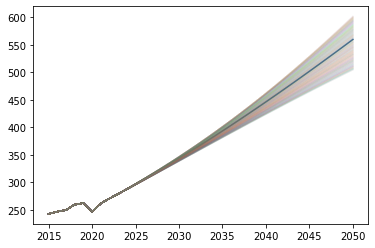

In [57]:
fields_examine = ["pib", "poblacion"]
df1 = df_ed_out[(df_ed_out["design_id"] == 1) & (df_ed_out["time_series_id"] == 0) & (df_ed_out["strategy_id"] == 1)]#[["master_id"] + fields_examine]

mas = list(df1["master_id"].unique())

for m in mas:
    
    dft = df1[df1["master_id"] == m]
    x = np.array(dft["year"])
    y = np.array(dft["pib"])
    
    if m == 1005:
        a = 1
    else:
        a = 0.05
    
    plt.plot(x, y, alpha = a)
    
plt.show()

In [61]:
max(df1[df1["year"] == 2050]["pib"])

601.9354499098257

In [41]:
pob = int(df1["poblacion"].iloc[0])
pib = int(df1["pib"].iloc[0])

In [46]:
min(df1["pib"])/pib

0.9022268899390369

In [32]:

all_params = list(set(df_pr["parameter"]))
all_params_tm = [x for x in all_params if "trajmix" in x]
params_trajmix = []

for x in all_params_tm:
    
    if "-" in x:
        x = x.split("-")[1]
    
    params_trajmix.append(x.replace("trajmix_", ""))


In [43]:
df_ed = pd.read_csv(sr.fp_csv_experimental_design_msec)

In [34]:
arch_all = "Chile_sector_package_2021_01_30_final"
df_prim = sr.get_archive_run(sr.fp_csv_prim_input_data.replace(".csv", "_design_id-1.csv"), arch_all)


In [39]:
arch_d1 = "Chile_sector_package_2021_01_30_design_id-1"
df_lhs = sr.get_archive_run(sr.fp_csv_lhs_table_multi_sector, arch_d1)




In [41]:
df_lhs[[x for x in df_lhs.columns if ("trajgroup" in x) and ("trajgroup")]]

,trajgroup_1-lhs,trajgroup_1-trajmax_copper_heat_diesel,trajgroup_1-trajmax_copper_heat_solar,trajgroup_1-trajmin_copper_heat_diesel,trajgroup_1-trajmin_copper_heat_solar,trajgroup_1-trajmix_copper_heat_diesel,trajgroup_1-trajmix_copper_heat_solar,trajgroup_2-lhs,trajgroup_2-trajmax_copper_open_pit_mine_diesel,trajgroup_2-trajmax_copper_open_pit_mine_electricitiy,...,trajgroup_6-trajmix_transport_frac_private_electric,trajgroup_6-trajmix_transport_frac_private_gasoline,trajgroup_6-trajmix_transport_frac_private_hyb,trajgroup_7-lhs,trajgroup_7-trajmax_transport_frac_truck_diesel,trajgroup_7-trajmax_transport_frac_truck_hydrogen,trajgroup_7-trajmin_transport_frac_truck_diesel,trajgroup_7-trajmin_transport_frac_truck_hydrogen,trajgroup_7-trajmix_transport_frac_truck_diesel,trajgroup_7-trajmix_transport_frac_truck_hydrogen
0,0.485770,0.977801,0.357776,0.818550,0.936624,0.551432,0.637682,0.565256,0.038377,0.946783,...,0.276551,0.925093,0.199338,0.229756,0.335704,0.550595,0.472805,0.793048,0.155635,0.112315
1,0.411031,0.755180,0.237562,0.156227,0.929556,0.245165,0.595448,0.458320,0.800346,0.938967,...,0.398746,0.934718,0.032574,0.371847,0.123336,0.453092,0.777633,0.261984,0.291836,0.538509
2,0.808543,0.666354,0.368444,0.171757,0.244714,0.169000,0.900776,0.197071,0.170923,0.748495,...,0.541340,0.704535,0.016904,0.701036,0.610254,0.807567,0.042673,0.617204,0.467909,0.684333
3,0.137164,0.279563,0.985121,0.677356,0.308748,0.322033,0.910091,0.908188,0.950908,0.943414,...,0.735542,0.990644,0.159860,0.140302,0.636807,0.055678,0.125456,0.393114,0.944857,0.903527
4,0.573853,0.100075,0.126307,0.653166,0.191518,0.418508,0.711461,0.645474,0.499741,0.081992,...,0.949977,0.289684,0.342353,0.533516,0.647132,0.495466,0.366168,0.505487,0.720012,0.576881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.893442,0.851150,0.241057,0.740359,0.608771,0.557137,0.683364,0.607316,0.907960,0.456333,...,0.302559,0.524937,0.400318,0.885569,0.149254,0.472448,0.855851,0.007148,0.575076,0.198139
196,0.146834,0.598795,0.616855,0.071965,0.039809,0.510335,0.399196,0.793566,0.624260,0.062070,...,0.888415,0.665751,0.102759,0.965437,0.028100,0.215025,0.956718,0.424307,0.218703,0.132111
197,0.708582,0.860055,0.140318,0.442250,0.203667,0.034646,0.187443,0.214285,0.889228,0.157056,...,0.422245,0.186862,0.515930,0.203098,0.464633,0.707419,0.700567,0.834434,0.052031,0.915727
198,0.658681,0.222066,0.038949,0.572993,0.044474,0.682669,0.344280,0.139038,0.663390,0.538651,...,0.019779,0.847310,0.668721,0.750551,0.234597,0.240722,0.339808,0.774580,0.222802,0.942663


In [8]:
df_params = pd.read_csv(sr.fp_csv_parameter_ranges)
df_params_add = pd.read_csv(os.path.join(sr.dir_ref, "ndc_plus_to_integrate", "parameter_ranges_carlos_ndc+.csv"))


In [32]:
#df_params_add[(df_params_add["strategy_id"].isin([0, 1])) & (df_params_add["time_series_id"].isin([0, 1]))][~df_params_add["parameter"].isin(df_params["parameter"])].to_csv("/Users/jsyme/Desktop/prange.csv", index = None, encoding = "UTF_8")
df_ed_sv = pd.read_csv(sr.fp_csv_experimental_design_msec_single_vals)


In [14]:
df_ed = pd.read_csv(sr.fp_csv_experimental_design_msec)
df_ed_sv = pd.read_csv(sr.fp_csv_experimental_design_msec_single_vals)

In [40]:
#df_ed[(df_ed["year"] == 2050)]["steel_efficiency_heat_biomass"]
list(df_ed_sv.columns).count("steel_efficiency_heat_biomass")

1

In [15]:
set([x for x in df_params_add["parameter"] if "trajgroup_8" in x])

{'trajgroup_8-lhs',
 'trajgroup_8-trajmax_steel_heat_biomass',
 'trajgroup_8-trajmax_steel_heat_coal',
 'trajgroup_8-trajmax_steel_heat_coke',
 'trajgroup_8-trajmax_steel_heat_hydrogen',
 'trajgroup_8-trajmin_steel_heat_biomass',
 'trajgroup_8-trajmin_steel_heat_coal',
 'trajgroup_8-trajmin_steel_heat_coke',
 'trajgroup_8-trajmin_steel_heat_hydrogen',
 'trajgroup_8-trajmix_steel_heat_biomass',
 'trajgroup_8-trajmix_steel_heat_coal',
 'trajgroup_8-trajmix_steel_heat_coke',
 'trajgroup_8-trajmix_steel_heat_hydrogen'}

In [41]:
steel_production = np.array(df_ed["steel_production"])
steel_intensity = np.array(df_ed["steel_intensity"])
steel_heat_biomass = np.array(df_ed["steel_heat_biomass"])
steel_share_heat = np.array(df_ed["steel_share_heat"])
steel_efficiency_heat_biomass = np.array(df_ed_sv["steel_efficiency_heat_biomass"])

steel_production * steel_intensity * steel_share_heat * steel_heat_biomass / steel_efficiency_heat_biomass



array([  0.        ,   0.        ,   0.        , ..., 314.09736639,
       311.87653832, 309.31609299])

In [66]:
fns = ["REAL", "DESIGN_ID_0", "DESIGN_ID_2", "DESIGN_ID_3"]

fields_sort = ["sector", "type", "parameter", "time_series_id", "strategy_id"]

for fn in fns:
    fr = os.path.join(sr.dir_ref, "parameter_ranges_" + fn + ".csv")
    df_tmp = pd.read_csv(fr)
    
    #get traj groups
    ap = list(set(df_tmp["parameter"]))
    ap.sort()
    #get all trajgroup parameters
    tgps = [x.split("-")[1].replace("trajmix_", "") for x in ap if ("trajmix" in x) and ("trajgroup" in x) and ("lhs" not in x)]
    tgps_drop = [x for x in tgps if (x in list(df_tmp["parameter"]))]
    #drop any that are designated in the file
    df_tmp = df_tmp[~df_tmp["parameter"].isin(tgps_drop)].sort_values(by = fields_sort).reset_index(drop = True)
    
    #write cleaned output
    df_tmp.to_csv(fr, index = None, encoding = "UTF-8")
    

In [61]:
df_tmp.shape

(3420, 46)

In [64]:
[x for x in tgps if x in list(df_tmp["parameter"])]

[]

In [58]:
df_tmp["parameter"]

0                                    medida_biodigestores
1                                    medida_biodigestores
2                                    medida_biodigestores
3                                    medida_biodigestores
4                              medida_cambio_dieta_bovina
                              ...                        
3439    transport_investment_cost_modal_split_private_...
3440    transport_investment_cost_modal_split_private_...
3441    transport_investment_cost_modal_split_private_...
3442    transport_investment_cost_modal_split_private_...
3443    transport_investment_cost_modal_split_private_...
Name: parameter, Length: 3444, dtype: object